In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords 
from bs4 import BeautifulSoup
import re
import unicodedata
import nltk
from collections import Counter
from itertools import chain
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc,classification_report,accuracy_score
from sklearn.model_selection import train_test_split 
nltk.download('stopwords')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
url = 'https://raw.githubusercontent.com/jarif87/DataSets/main/text_messages.csv'



df = pd.read_csv(url)

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
wordcloud_mask=np.array(Image.open("/kaggle/input/wodcloud-twiter-pic/twitter.png"))

In [4]:
df.rename(columns={"Message": "text", "Category": "label"},inplace=True)

In [5]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
df.shape

(5572, 2)


## ham==0
## spam==1


In [9]:
df['label'].replace({'ham': 0, 'spam': 1}, inplace=True)
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
stopword = set(stopwords.words('english')) 
print(stopword)

{'they', 'itself', "isn't", 'some', 'only', 'did', 'there', 'to', 'while', "couldn't", 'for', 'your', 'why', 'be', 'yourself', 'other', 'himself', 'down', 'we', 'an', 'hadn', 'the', 'themselves', 'hasn', 'him', "wasn't", 'very', 'out', 'few', 'doesn', 'he', "you'd", 'them', 'can', 've', "mustn't", 'on', "didn't", 'will', 'up', 'and', 'don', 'm', "needn't", 'were', 'weren', 'doing', 'a', 'her', 'mustn', 'not', "hasn't", 'yourselves', 'this', 'should', 'under', 'whom', 'hers', 'same', 'y', "don't", 'then', 'wouldn', 'has', 'than', 'you', 'about', 'does', 'needn', "she's", 'ain', 'against', 'at', 'from', 'when', 'our', 'once', 'here', 'are', "hadn't", 'shan', 'between', 'it', 'below', "that'll", 'am', 'haven', 'no', "you're", 'me', 'who', 'theirs', 'do', 'what', "mightn't", 'is', 'each', 'or', "you'll", 'didn', 'so', "wouldn't", "won't", "haven't", 'during', 'more', "should've", 'i', 'had', 'nor', 'yours', "you've", 'but', 'how', 're', 't', 'his', 'which', "weren't", 'herself', 'ourselves

In [11]:
file_id=stopwords.fileids()
print(file_id)

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


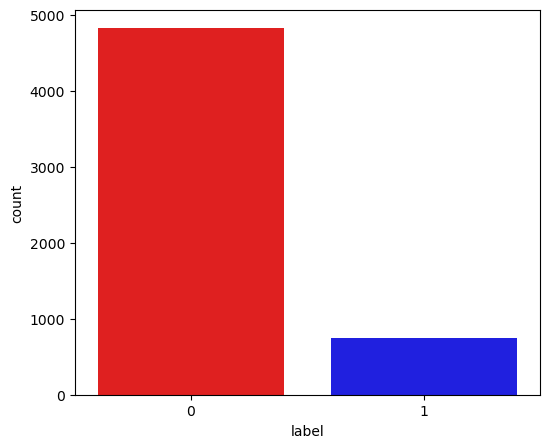

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(x="label",data=df,palette=["red","blue"])
plt.show()

# Data Length

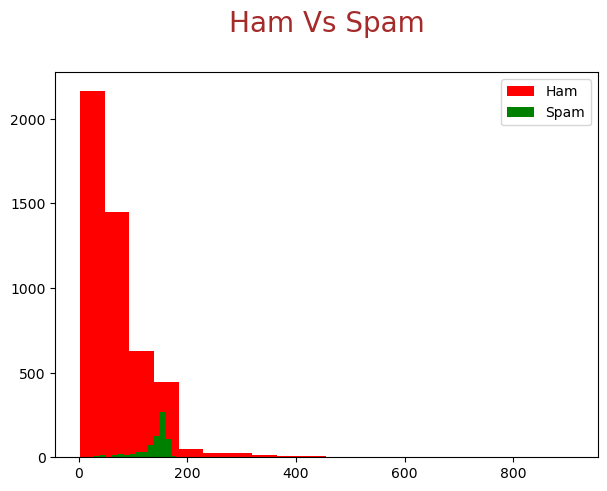

In [13]:
ham_len=df[df["label"]==0]["text"].str.len()
spam_len=df[df["label"]==1]["text"].str.len()
plt.figure(figsize=(7,5))
plt.hist(ham_len, bins=20,label='Ham',color="red")
plt.hist(spam_len , bins=20, label='Spam',color="green")
plt.title("Ham Vs Spam\n",fontsize=20,color="brown")
plt.legend()
plt.show()

# Wordcloud

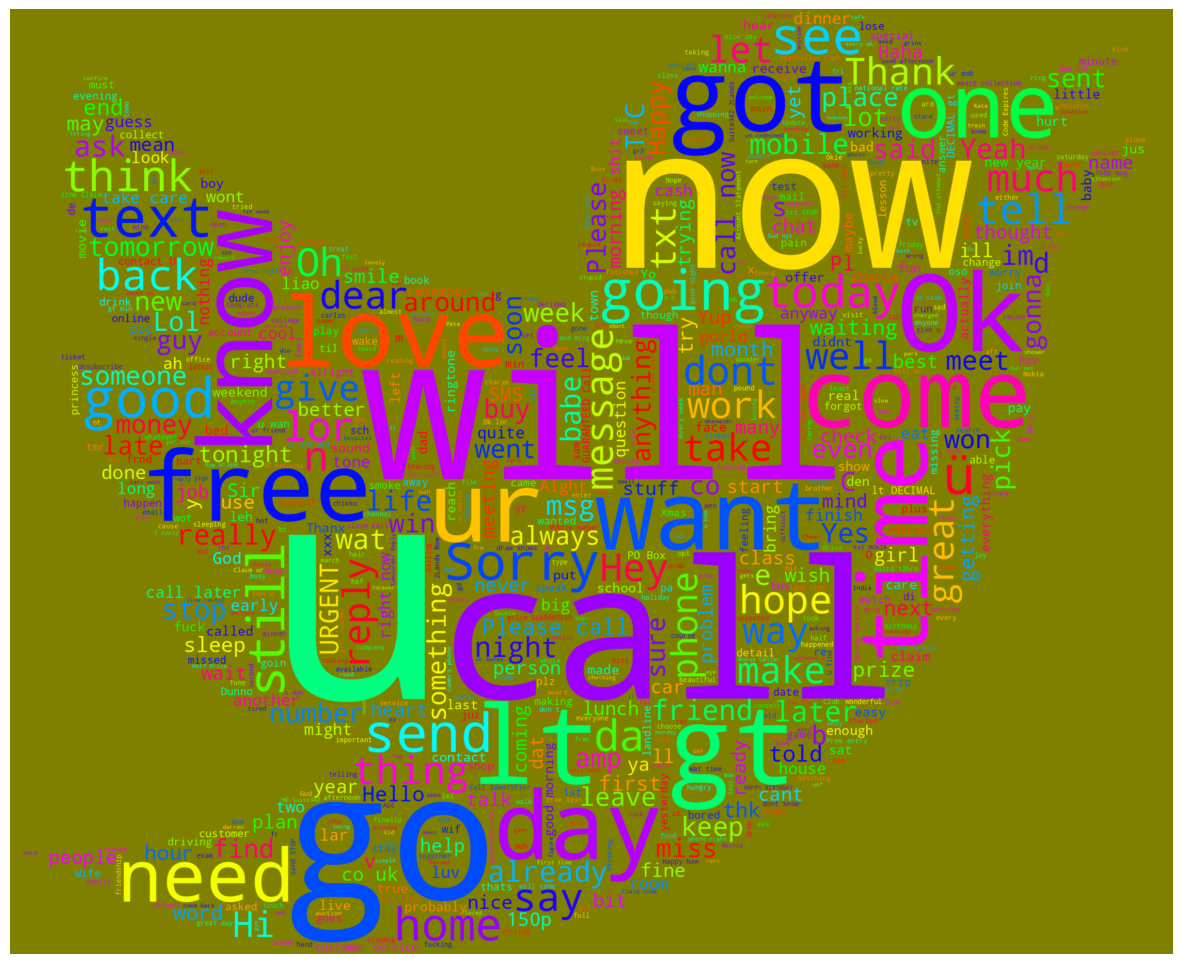

In [14]:
plt.figure(figsize=(15,15))
all_text=" ".join(df['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='olive', max_words=800,colormap="hsv",mask=wordcloud_mask).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

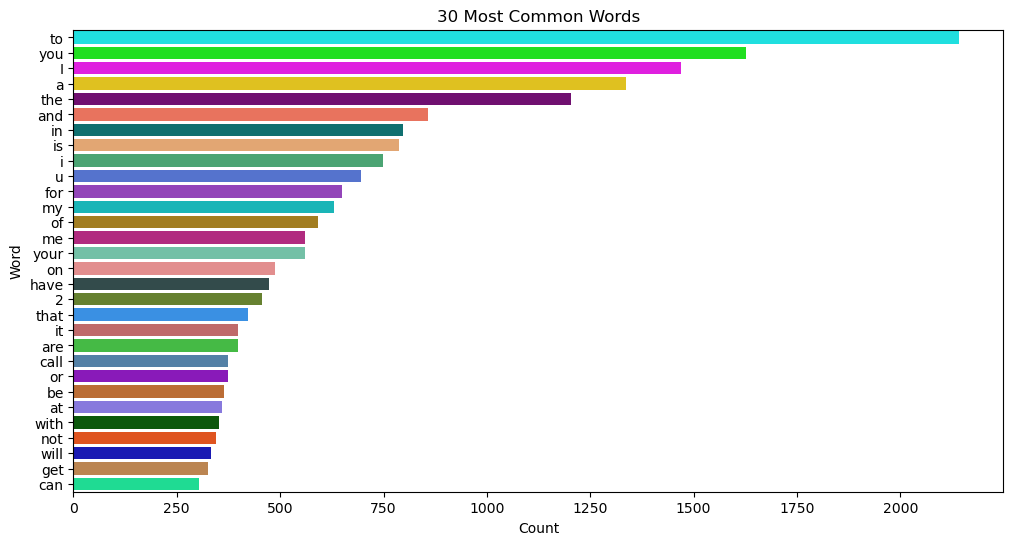

In [15]:
data_set =df["text"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(30)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('30 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [16]:
df.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
df.text[5]

"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"

# Cleaning Text

In [18]:
def clean_text(text):
    
    # Remove HTML tags if present
    if "<" in text:
        text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Remove URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    
    # Remove accented characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    
    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(filtered_words)
    
    return text


In [19]:
df["text"] = df["text"].apply(clean_text)

In [20]:
df["text"][0]

'Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat'

In [21]:
df["text"][5]

'FreeMsg Hey darling week word back like fun still Tb ok XxX std chgs send rcv'

# Lemmatization

In [22]:
# !pip install --upgrade nltk

# nltk.download('wordnet')
# lemmatizer = WordNetLemmatizer()

# def lemmatize_text(text):
#     lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in text])
#     return lemmatized_text

# df["text"] = df["text"].apply(lemmatize_text)

# TF-IDF vectorizer

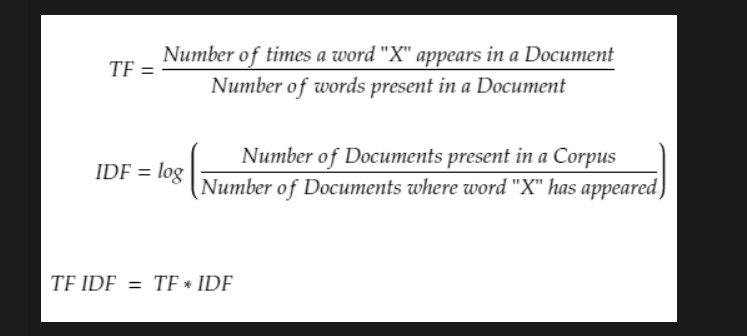

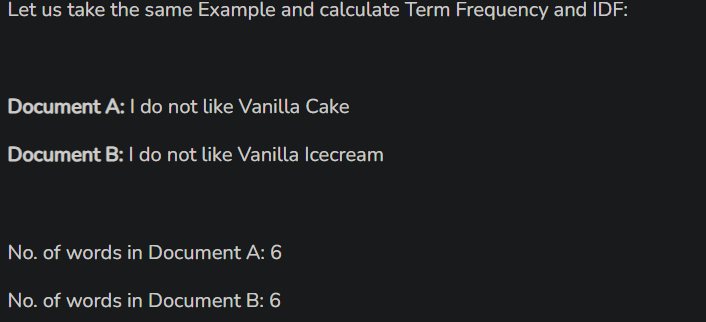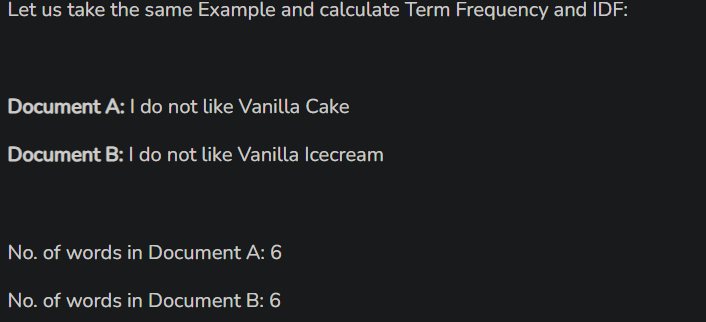

![](https://ptime.s3.ap-northeast-1.amazonaws.com/media/natural_language_processing/text_feature_Engineering/term-frequency.PNG)

![](https://ptime.s3.ap-northeast-1.amazonaws.com/media/natural_language_processing/text_feature_Engineering/Inverse-Document-frequency.PNG)

In [23]:
tf_idf= TfidfVectorizer()
train_data = tf_idf.fit_transform(df["text"])
label_data = df["label"]

In [24]:
print(train_data)

  (0, 7205)	0.19439301621220648
  (0, 219)	0.34791378316797533
  (0, 2670)	0.16293432826450518
  (0, 1149)	0.29391896993551636
  (0, 864)	0.33212131268075984
  (0, 3514)	0.2815155077148127
  (0, 7416)	0.23533662234485578
  (0, 2708)	0.19218776551461134
  (0, 866)	0.29391896993551636
  (0, 446)	0.2602281634274996
  (0, 1418)	0.2694352757694386
  (0, 4902)	0.2721224808211129
  (0, 3393)	0.34791378316797533
  (0, 2629)	0.15671412578180477
  (1, 4536)	0.5466243141314314
  (1, 7320)	0.43162957585464123
  (1, 3361)	0.5236804332035243
  (1, 3547)	0.4083258549263009
  (1, 4509)	0.2718944069420321
  (2, 303)	0.18720127610891343
  (2, 5236)	0.18720127610891343
  (2, 6895)	0.1373132246657853
  (2, 6218)	0.21809822214350724
  (2, 5184)	0.198227570891831
  (2, 5291)	0.18540413285521606
  :	:
  (5567, 4757)	0.25536287320784645
  (5567, 5236)	0.2821057378142255
  (5568, 2062)	0.6485991737677518
  (5568, 2424)	0.5597098620657655
  (5568, 2639)	0.3642369776828009
  (5568, 2959)	0.3652059777476414
  (55

In [25]:
x_train,x_test,y_train,y_test=train_test_split(train_data,label_data,test_size=0.2,random_state=42)

# Support Vector Machine + Random Forest Model

Model: SVC
Accuracy Score = 0.9730941704035875
Confusion Matrix:



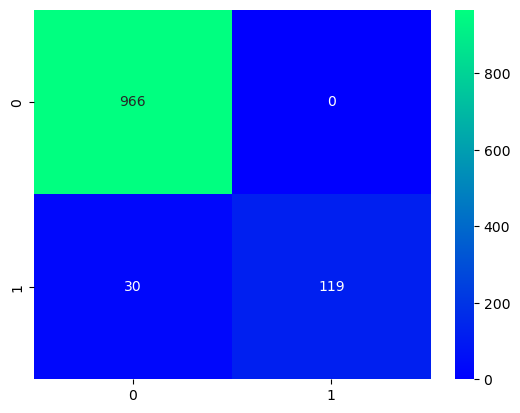

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       996
           1       0.80      1.00      0.89       119

    accuracy                           0.97      1115
   macro avg       0.90      0.98      0.94      1115
weighted avg       0.98      0.97      0.97      1115

ROC AUC Score: 0.8993288590604027


Model: RandomForestClassifier
Accuracy Score = 0.9775784753363229
Confusion Matrix:



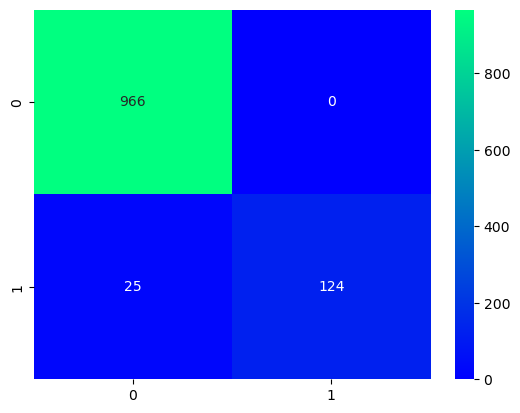

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       991
           1       0.83      1.00      0.91       124

    accuracy                           0.98      1115
   macro avg       0.92      0.99      0.95      1115
weighted avg       0.98      0.98      0.98      1115

ROC AUC Score: 0.9161073825503356




In [26]:

models = [SVC(), RandomForestClassifier()]

for model in models:
    model.fit(x_train, y_train)

    pred = model.predict(x_test)

    print(f"Model: {type(model).__name__}")
    print('Accuracy Score =',accuracy_score(y_test,pred))
    print("Confusion Matrix:\n")
    cf_matrix = confusion_matrix(y_test, pred)
    sns.heatmap(cf_matrix, annot=True, cmap='winter', fmt='d')
    plt.show()
    print("=============================================================================")
    print(classification_report(pred,y_test))
    print("=============================================================================")
 
    roc_auc = roc_auc_score(y_test, pred)
    print("ROC AUC Score:", roc_auc)
    print("=============================================================================")

    print('\n')


# Roc Auc Curve

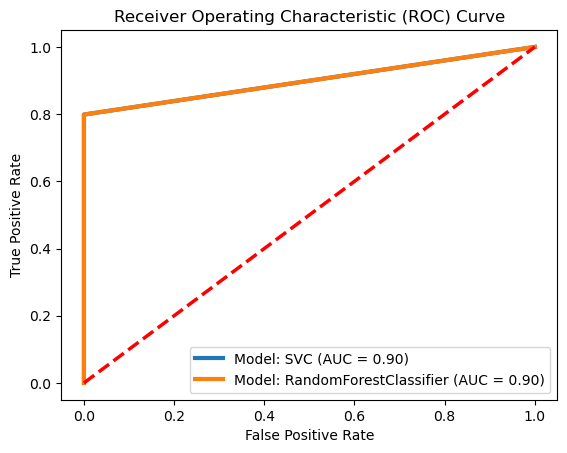

In [27]:

models = [SVC(), RandomForestClassifier()]

for model in models:
    model.fit(x_train, y_train)

    pred = model.predict(x_test)
   

    fpr, tpr, thresholds = roc_curve(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred)

    plt.plot(fpr, tpr, label=f"Model: {type(model).__name__} (AUC = {roc_auc:.2f})",lw=3)

plt.plot([0, 1], [0, 1], linestyle='--', color='r',lw=2.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Model Prediction ON Custom Data

In [28]:
random_text = "These messages claim that the recipient has won a lottery of $100000000 and request personal information or payment to receive the supposed winnings. Remember, you have to send $1000 to claim this lottery. Legitimate lotteries and contests do not ask for upfront fees to claim prizes before the deadline "

preprocessed_text = clean_text(random_text)

text_vector = tf_idf.transform([preprocessed_text])

for model in models:
    prediction = model.predict(text_vector)
    print(f"Model: {type(model).__name__}")
    print("Prediction:", prediction)
    print('\n')

Model: SVC
Prediction: [1]


Model: RandomForestClassifier
Prediction: [1]




# References

* **https://padhaitime.com/Natural-Language-Processing/TF-IDF**
* **https://www.machinelearningplus.com/nlp/lemmatization-examples-python/**
* **https://michael-fuchs-python.netlify.app/2021/06/16/nlp-text-pre-processing-vi-word-removal/**

